<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Definitions" data-toc-modified-id="Definitions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Definitions</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Graphics" data-toc-modified-id="Graphics-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Graphics</a></span></li><li><span><a href="#Splitting-Data" data-toc-modified-id="Splitting-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Splitting Data</a></span></li><li><span><a href="#Null-Data" data-toc-modified-id="Null-Data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Null Data</a></span></li><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Feature Scaling</a></span></li></ul></li><li><span><a href="#Pipeline" data-toc-modified-id="Pipeline-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pipeline</a></span><ul class="toc-item"><li><span><a href="#Numerical-Pipeline" data-toc-modified-id="Numerical-Pipeline-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Numerical Pipeline</a></span></li><li><span><a href="#Categorical-Pipeline" data-toc-modified-id="Categorical-Pipeline-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Categorical Pipeline</a></span></li><li><span><a href="#Full-Pipeline" data-toc-modified-id="Full-Pipeline-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Full Pipeline</a></span></li></ul></li><li><span><a href="#Training-a-Model" data-toc-modified-id="Training-a-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training a Model</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#SGD-Classifier" data-toc-modified-id="SGD-Classifier-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SGD Classifier</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Decision Trees</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Multi-Layer-Perceptron" data-toc-modified-id="Multi-Layer-Perceptron-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Multi Layer Perceptron</a></span></li></ul></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Predicting-Null-Data" data-toc-modified-id="Predicting-Null-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Predicting Null Data</a></span></li><li><span><a href="#Test-Accuracy" data-toc-modified-id="Test-Accuracy-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Test Accuracy</a></span></li></ul></div>

In this implementation, we will explore a dataset with informations of German credit risk. In this financial context, we have data of German borrowers, such as _age_, _sex_, _saving accounts_, and so on, with the goal to predict whenever there is a credit risk for the loaner.

The dataset includes the following features:
* Age (numeric);
* Sex (text: male, female);
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled);
* Housing (text: own, rent, or free);
* Saving accounts (text - little, moderate, quite rich, rich); - _Conta Poupança_
* Checking account (numeric, in DM - Deutsch Mark); - _Conta Corrente_
* Credit amount (numeric, in DM);
* Duration (numeric, in month);
* Purpose (text: car, furniture/equipement, radio/TV, domestic appliances, repairs, education, business, vacation/others)
* **Risk (text: good, bad)**

## Objectives

Through exploratory data analysis and training models, we intend to answear some questions and observe some points:
* What are the marjority attributes of the dataset?
    * Count values for sex, housing, saving_accounts, checking_account, purpose, risk?
    * Different ways and different charts to visualize it.
* Mean credit amount requested by gender?
* Distribution of credit amount requested by gender.
* Mean credit amount requested by purpose.
* Is there any relationship between credit amount, purpose and risk?
* Mean credit amount for categories of saving_accounts, checking_account by risk.
* Mean duration of credit request by purpose and risk.
* Distribution of duration of credit request by risk.
* Correlation between numerical features.
* Frequency and count of housing by risk.
* Frequency and count of job by risk.
* Visualize outliers for credit amount requested by purpose

* **Train a model to predict credit risk with good accuracy**

## Definitions

First of all, lets import the libraries to be used in this project.

In [1]:
# Importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Now, we have to define all the functions to be used.

In [2]:
def categorical_plot(cols_cat):
    """docstring for categorical_plot:
    this function will be use to plot, in once, the count of categorical features
    
    input:
        cols_cat: list of categorical features"""
    
    # Creating figure
    fig, axs = plt.subplots(2, 3, figsize=(10, 6))
    idx_row = 0
    for col in cols_cat:
        # Returning column index
        idx_col = cols_cat.index(col)

        # Verifying brake line in figure (second row)
        if idx_col >= 3:
            idx_col -= 3
            idx_row = 1

        # Plot params
        names = df[col].value_counts().index
        heights = df[col].value_counts().values

        # Bar chart
        axs[idx_row, idx_col].bar(names, heights)
        if (idx_row, idx_col) == (0, 2):
            y_pos = np.arange(len(names))
            axs[idx_row, idx_col].tick_params(axis='x', labelrotation=30)
        if (idx_row, idx_col) == (1, 1):
            y_pos = np.arange(len(names))
            axs[idx_row, idx_col].tick_params(axis='x', labelrotation=90)

        total = df[col].value_counts().sum()
        axs[idx_row, idx_col].patch.set_facecolor('#FFFFFF')
        axs[idx_row, idx_col].spines['bottom'].set_color('#CCCCCC')
        axs[idx_row, idx_col].spines['left'].set_color('#CCCCCC')
        axs[idx_row, idx_col].spines['top'].set_color('#FFFFFF')
        axs[idx_row, idx_col].spines['right'].set_color('#FFFFFF')
        for p in axs[idx_row, idx_col].patches:
            w, h = p.get_width(), p.get_height()
            x, y = p.get_xy()
            axs[idx_row, idx_col].annotate('{:.1%}'.format(h/1000), (p.get_x()+.29*w,
                                            p.get_y()+h+20), color='k')

        # Plot configuration
        axs[idx_row, idx_col].set_title(col, size=12)
        axs[idx_row, idx_col].set_ylim(0, heights.max()+120)
        plt.tight_layout()

def individual_cat_plot(col):
    """docstring for individual_cat_plot
    With this function we can plot individual categorical features and see more details
    
    input:
        col: categorical feture to be analyzed"""
    
    # If the parameter isn't a categorical feature, return a message
    if col not in ['sex', 'housing', 'saving_accounts', 'checking_account',
            'purpose', 'risk']:
        return "Atributo não categórico"
    
    # Creating figure and showing data
    fig, ax = plt.subplots(figsize=(8, 5))
    names = df[col].value_counts().index
    heights = df[col].value_counts().values
    total = df[col].value_counts().sum()
    # Due to its diversity, the feature purpose will be plotted in a horizontal bar chart
    if col == 'purpose':
        ax.barh(names, heights)
        ax.set_title(col.capitalize().replace('_', ' '), size=15)
        ax.patch.set_facecolor('#FFFFFF')
        ax.spines['bottom'].set_color('#CCCCCC')
        ax.spines['left'].set_color('#CCCCCC')
        ax.spines['top'].set_color('#FFFFFF')
        ax.spines['right'].set_color('#FFFFFF')
        for i in ax.patches:
            # get_width pulls left or right; get_y pushes up or down
            ax.text(i.get_width()+2, i.get_y()+.50, \
                    str(round((i.get_width()/total)*100, 1))+'%', fontsize=12,
        color='dimgrey')
        plt.gca().invert_yaxis()
    else:
        ax.bar(names, heights)
        ax.set_title(col.capitalize().replace('_', ' '), size=15)
        ax.patch.set_facecolor('#FFFFFF')
        ax.spines['bottom'].set_color('#CCCCCC')
        ax.spines['left'].set_color('#CCCCCC')
        ax.spines['top'].set_color('#FFFFFF')
        ax.spines['right'].set_color('#FFFFFF')
        for i in ax.patches:
            # get_x pulls left or right; get_height pushes up or down
            ax.text(i.get_x()+.3, i.get_height()+8, \
                    str(round((i.get_height()/total)*100, 1))+'%', fontsize=12,
                        color='dimgrey')

def individual_cat_pie_plot(col):
    """docstring for individual_cat_pie_plot
    With this function we can plot individual categorical features 
    and see more details in a pie chart
    
    input:
        col: categorical feture to be analyzed"""
    
    # If the parameter isn't a categorical feature, return a message
    if col not in ['sex', 'housing', 'saving_accounts', 'checking_account',
            'purpose', 'risk']:
        return "Atributo não categórico"
    
    # Creating figure and showing data
    names = df[col].value_counts().index
    heights = df[col].value_counts().values
    total = df[col].value_counts().sum()
    fig, ax = plt.subplots(figsize=(5, 5))
    cs = cm.viridis(np.arange(len(names))/len(names))
    explode = np.zeros(len(names))
    explode[0] = 0.05
    wedges, texts, autotexts = ax.pie(heights, labels=names, explode=explode,
                                       startangle=90, shadow=False, 
                                      autopct='%1.1f%%', colors=cs)
    ax.axis('equal')
    plt.title(col.capitalize().replace('_', ' '), size=15)
    plt.legend(fontsize=10, loc='best')
    plt.tight_layout()
    plt.setp(autotexts, size=12, color='w')
    plt.show()

def plot_roc_curve(fpr, tpr, label=None):
    """docstring for plot_roc_curve:
    function responsible for plot the ROC curve of a model
    
    input:
        fpr: false positive rate
        tpr: true positive rate"""
    
    # Showing data
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

def full_train_analysis(model, X, y, acc=True, cross_val=True, cv=5, precision=True, 
                        recall=True, f1=True, conf_mx=True, roc=True):
    """docstring for full_train_analysis:
    with this function, we can make a full analysis of a training model. 
    the function prints out:
        model accuracy, cross validation analysis, precision, recall, f1_score,
        confusion matrix and the ROC curve
    
    input:
        model: training model
        X: features
        y: label
        acc: flag for printing accuracy (default=True)
        cross_val: flag for printing cross validation analysis (default=True)
        cv: kfolds for cross validation (default=5)
        precision: flag for printing precision (default=True)
        recall: flag for printing recall (default=True)
        f1: flag for printing f1_score (default=True)
        conf_mx: flag for printing confusion matrix (default=True)
        roc: flag for printing the ROC curve (default=True)"""
    
    # Computing analysis requirements
    flag_tree = False
    y_pred = model.predict(X)
    y_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    y_cfmx_pred = cross_val_predict(model, X, y, cv=cv)
    
    try:
        y_roc_pred = cross_val_predict(model, X, y, cv=5, method='decision_function')
    except:
        # Decision Trees and Random Forest don't have decision_function
        y_probas = cross_val_predict(model, X, y, cv=5, method='predict_proba')
        y_scores_tree = y_probas[:, 1]
        flag_tree = True
    
    # Analysis
    if acc:
        accuracy = accuracy_score(y_pred, y)
        print(f'Model Accuracy: {accuracy:.2f}')
    if cross_val:
        print(f'\nCross Validation: {y_scores}')
    if precision:
        p_score = precision_score(y, y_pred)
        print(f'\nPrecision: {p_score:.2f}')
    if recall:
        r_score = recall_score(y, y_pred)
        print(f'\nRecall: {r_score:.2f}')
    if f1:
        f_score = f1_score(y, y_pred)
        print(f'\nf1_score: {f_score:.2f}')
    if conf_mx:
        matriz = confusion_matrix(y, y_cfmx_pred)
        print(f'\nConfusion Matrix: \n{matriz}')
    if roc:
        if flag_tree:
            fpr, tpr, thresholds = roc_curve(y, y_scores_tree)
        else:
            fpr, tpr, thresholds = roc_curve(y, y_roc_pred)
        plot_roc_curve(fpr, tpr)

Defining classes for data transformation

In [3]:
"""class for fill null data with most common instance"""
class FillNAMostCommon(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        most_common_cc = X['checking_account'].value_counts().index[0]
        X = X.fillna(value=most_common_cc)
        most_common_cp = X['saving_accounts'].value_counts().index[0]
        X = X.fillna(value=most_common_cp)
        
        return X

## EDA

In [4]:
# Reading data
df = pd.read_csv('german_credit_data.csv', index_col=0)
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
# Changing column names
df.columns = [col.replace(' ', '_').lower() for col in df.columns]

df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
# Dataset dimensions
print(f'Dimensions: {df.shape}')

Dimensions: (1000, 10)


In [7]:
# Null data
df.isnull().sum()

age                   0
sex                   0
job                   0
housing               0
saving_accounts     183
checking_account    394
credit_amount         0
duration              0
purpose               0
risk                  0
dtype: int64

In [8]:
# Detailed information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
age                 1000 non-null int64
sex                 1000 non-null object
job                 1000 non-null int64
housing             1000 non-null object
saving_accounts     817 non-null object
checking_account    606 non-null object
credit_amount       1000 non-null int64
duration            1000 non-null int64
purpose             1000 non-null object
risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [9]:
# Describing statistics
df.describe()

,age,job,credit_amount,duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


### Graphics

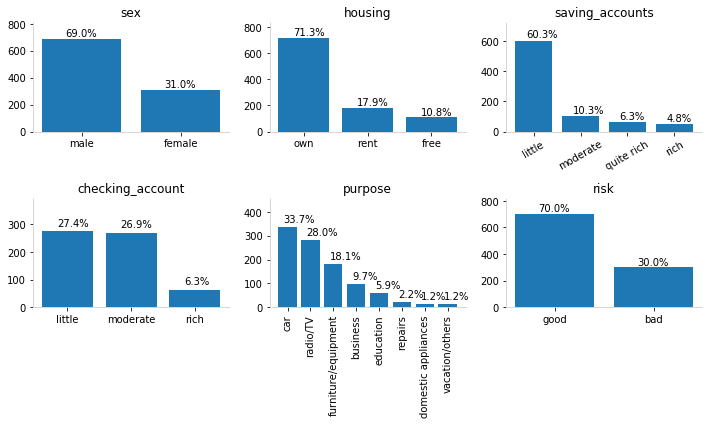

In [10]:
# Plotting count of categorical features
cols_cat = ['sex', 'housing', 'saving_accounts', 'checking_account',
            'purpose', 'risk']
categorical_plot(cols_cat)

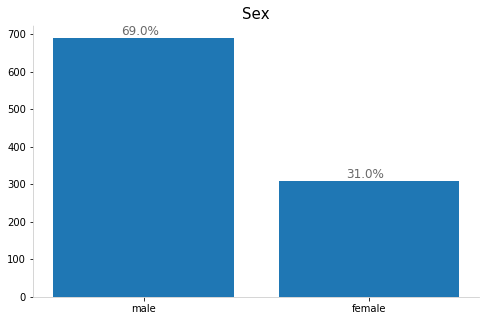

In [11]:
# Inividual categorial plot (sex)
individual_cat_plot('sex')

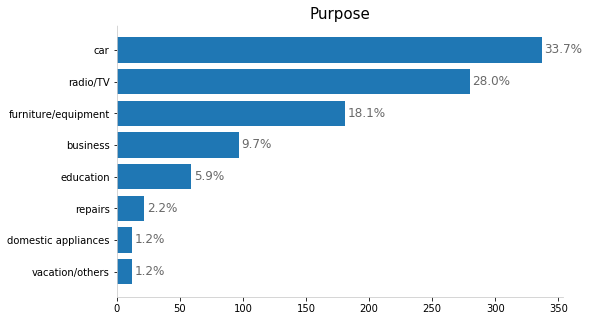

In [12]:
# Inividual categorial plot (purpose)
individual_cat_plot('purpose')

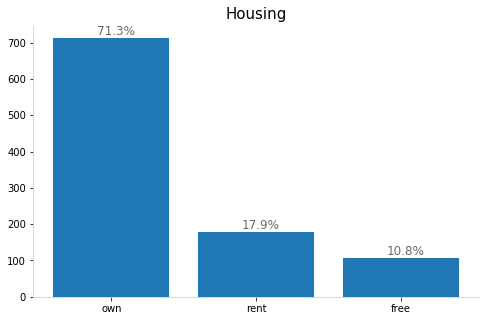

In [13]:
# Inividual categorial plot (purpose)
individual_cat_plot('housing')

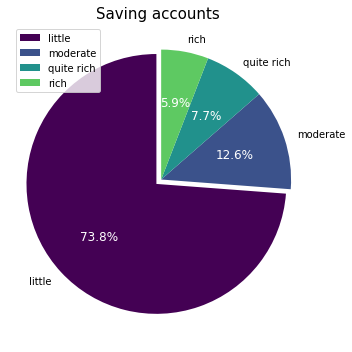

In [14]:
# Pie plots
individual_cat_pie_plot('saving_accounts')

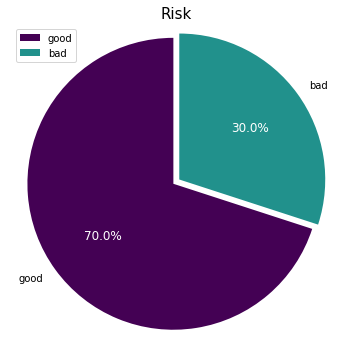

In [15]:
# Label risk
individual_cat_pie_plot('risk')

**Some conclusions:**

* **sex:** in this dataset, information of 69% of instances is from male gender. 31% are from female gender;
* **housing:** most of borrowers have their own house;
* **saving_accounts:** most of them have little saving accounts and only 6.3% are quite rich;
* **checking_account:** there is a balance between little and moderate checking account;
* **purpose:** the main reason of credit requirement is for buying cars, followed by radio/TV and furniture/equipment;
* **risk:** 70% of dataset is labeled with good risk and 30% is labeled with bad risk.

Well, the analysis above was quite good and gave us some inspiration and knowledge about data. But our intention is to view relationships between features, specially with our label risk.

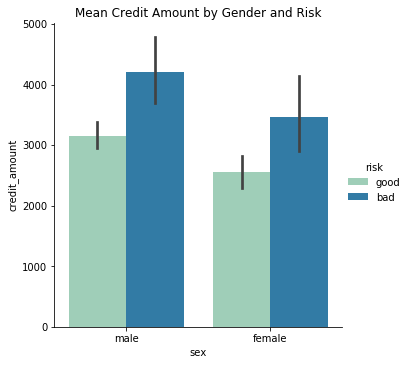

In [16]:
# Credit amount by gender and risk
ax = sns.catplot(x='sex', y='credit_amount', hue='risk', kind='bar', 
            data=df, palette="YlGnBu")
plt.title('Mean Credit Amount by Gender and Risk')
plt.show()

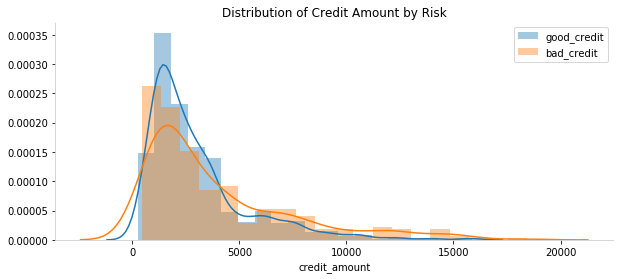

In [17]:
# Credit amount distribution
fig, ax = plt.subplots(figsize=(10, 4))
risk_good = df.loc[df['risk'] == 'good']
risk_bad = df.loc[df['risk'] == 'bad']
ax = sns.distplot(risk_good['credit_amount'], bins=20, label='good_credit')
ax = sns.distplot(risk_bad['credit_amount'], bins=20, label='bad_credit')
ax.set_title('Distribution of Credit Amount by Risk')
ax.patch.set_facecolor('#FFFFFF')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['left'].set_color('#CCCCCC')
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
plt.legend()
plt.show()

**Some conclusions:**
* In general, people of male gender request bigger credit values;
* The distribution of credit amount indicates that bad risk is related with the high values for credit request (above 4.800,00 approx)

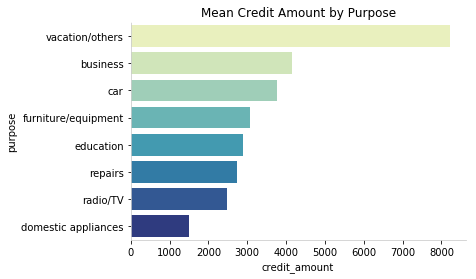

In [18]:
# Credit amount byb purpose
idx_sorted = df.groupby('purpose').mean()['credit_amount'].sort_values(ascending=False).index
fig, ax = plt.subplots()
ax = sns.barplot(x='credit_amount', y='purpose', data=df, ci=None, 
            palette="YlGnBu", order=idx_sorted)
ax.set_title('Mean Credit Amount by Purpose')
ax.patch.set_facecolor('#FFFFFF')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['left'].set_color('#CCCCCC')
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
plt.show()

* Vacations/Others, Business and Cars bringh forth the highest values for credit amount;
* Domestic Appliances has the lowest mean value for credit amount.

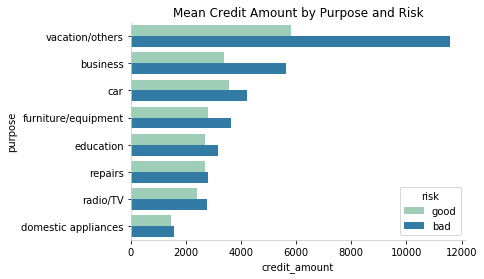

In [19]:
# Bringing forth risk
idx_sorted = df.groupby('purpose').mean()['credit_amount'].sort_values(ascending=False).index
fig, ax = plt.subplots()
ax = sns.barplot(x='credit_amount', y='purpose', data=df, ci=None, hue='risk',
            palette="YlGnBu", order=idx_sorted)
ax.set_title('Mean Credit Amount by Purpose and Risk')
ax.patch.set_facecolor('#FFFFFF')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['left'].set_color('#CCCCCC')
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
plt.show()

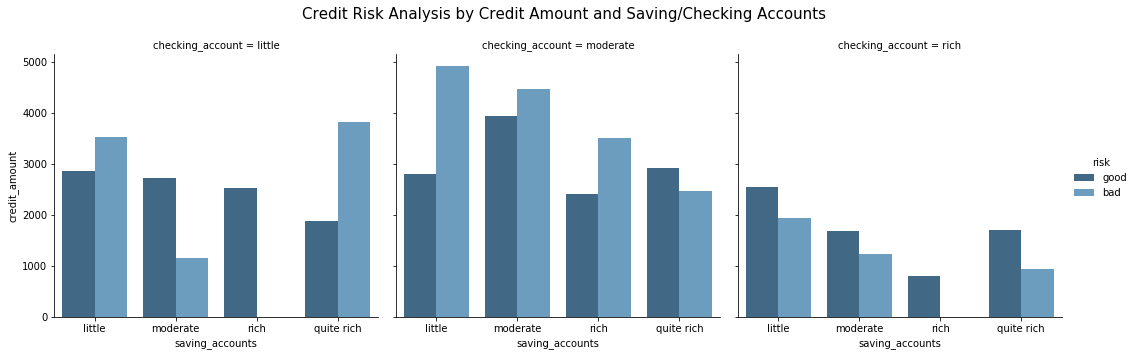

In [20]:
# Checking and Saving Accounts
idx_sorted = ['little', 'moderate', 'rich', 'quite rich']
ax = sns.catplot(x='saving_accounts', y='credit_amount', data=df, ci=None, hue='risk',
             col='checking_account', palette="Blues_d", order=idx_sorted, kind='bar')
fig = ax.fig
fig.suptitle('Credit Risk Analysis by Credit Amount and Saving/Checking Accounts',
             size=15)
plt.subplots_adjust(top=0.85)
plt.show()

**Some conclusions:**

* **1.** Borrowers with very good checking accounts (rich) have the lowest mean credit requests.

* **2.** There is no bad risk for people with good saving accounts (rich)

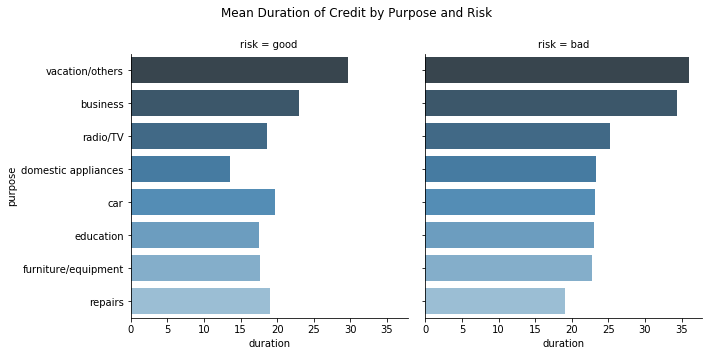

In [21]:
df_bad = df[df['risk'] == 'bad']
# Duration
idx_sorted = df_bad.groupby('purpose').mean().\
           sort_values('duration', ascending=False).index
ax = sns.catplot(x='duration', y='purpose', data=df, ci=None,
             col='risk', palette="Blues_d", order=idx_sorted, kind='bar')
fig = ax.fig
fig.suptitle('Mean Duration of Credit by Purpose and Risk',
             size=12)
plt.subplots_adjust(top=0.85)
plt.show()

* **1.** In general, credit requests with high duration represents risk;
* **2.** If we look at domestic appliances, we can see that the mean duration for a good risk is about 14. The difference between the duration of the same purpose for bad risk is visible. This indicates that if the bank receives a request for domestic appliance with long duration, this represents a bad risk.

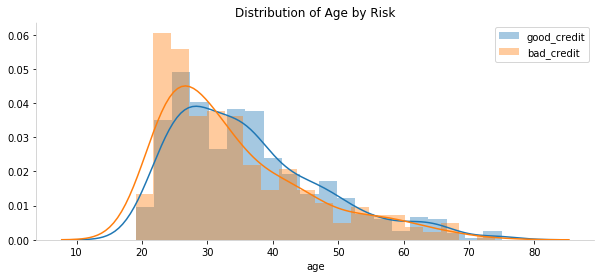

In [22]:
# Age distribution
fig, ax = plt.subplots(figsize=(10, 4))
risk_good = df.loc[df['risk'] == 'good']
risk_bad = df.loc[df['risk'] == 'bad']
ax = sns.distplot(risk_good['age'], bins=20, label='good_credit')
ax = sns.distplot(risk_bad['age'], bins=20, label='bad_credit')
ax.set_title('Distribution of Age by Risk')
ax.patch.set_facecolor('#FFFFFF')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['left'].set_color('#CCCCCC')
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
plt.legend()
plt.show()

The risk is higher when age of borrower is between 20 and 30.

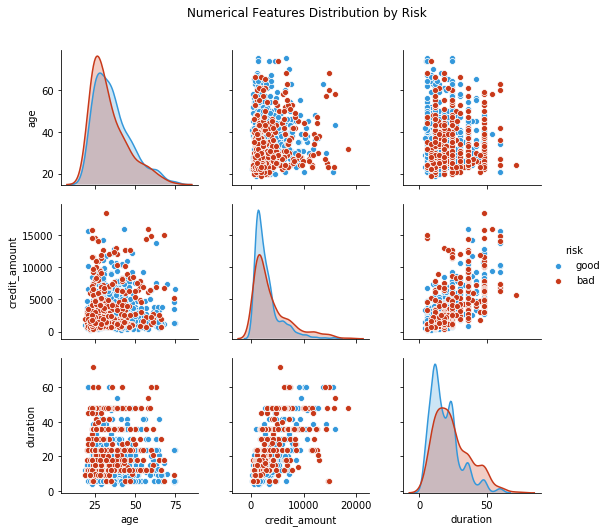

In [23]:
# Numerical features
cols_pairplot_analyis = ['age', 'credit_amount', 'duration', 'risk']
df_pairplot = df.loc[:, cols_pairplot_analyis]
custom_colors = ["#3498db", "#C8391A"]
ax = sns.pairplot(data=df_pairplot, hue='risk', palette=custom_colors);
fig = ax.fig
fig.suptitle('Numerical Features Distribution by Risk', size=12)
plt.subplots_adjust(top=.90)
plt.show()

**Some conclusions:**
* **1.** There is a direct correlation between duration and credit amount. In other words, it is possible to say when higher duration of credit, the higher the credit amount.
* **2.** Inside this correlation, it is possible to view some good points:
    - There is some outliers if we look the visualization separated by risk: requests with low duration and high credit amount represents a bad risk.

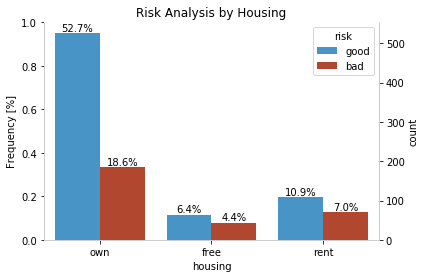

In [24]:
# Housing
ncount = len(df)
fig, ax = plt.subplots()
custom_colors = ["#3498db", "#C8391A"]
ax = sns.countplot(x='housing', data=df, hue='risk', palette=custom_colors)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

# Configurando bordas
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['left'].set_color('#CCCCCC')
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#CCCCCC')
ax2.patch.set_facecolor('#FFFFFF')
ax2.spines['bottom'].set_color('#CCCCCC')
ax2.spines['left'].set_color('#CCCCCC')
ax2.spines['top'].set_color('#FFFFFF')
ax2.spines['right'].set_color('#CCCCCC')

# Configurando porcentagens no gráfico
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.title('Risk Analysis by Housing')
plt.show()

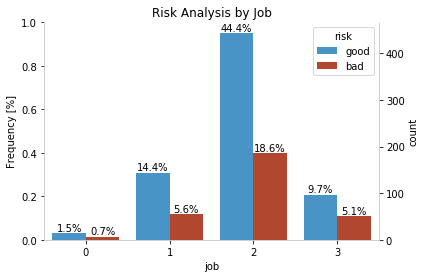

In [25]:
# Job
ncount = len(df)
fig, ax = plt.subplots()
custom_colors = ["#3498db", "#C8391A"]
ax = sns.countplot(x='job', data=df, hue='risk', palette=custom_colors)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

# Configurando bordas
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['left'].set_color('#CCCCCC')
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#CCCCCC')
ax2.patch.set_facecolor('#FFFFFF')
ax2.spines['bottom'].set_color('#CCCCCC')
ax2.spines['left'].set_color('#CCCCCC')
ax2.spines['top'].set_color('#FFFFFF')
ax2.spines['right'].set_color('#CCCCCC')

# Configurando porcentagens no gráfico
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.title('Risk Analysis by Job')
plt.show()

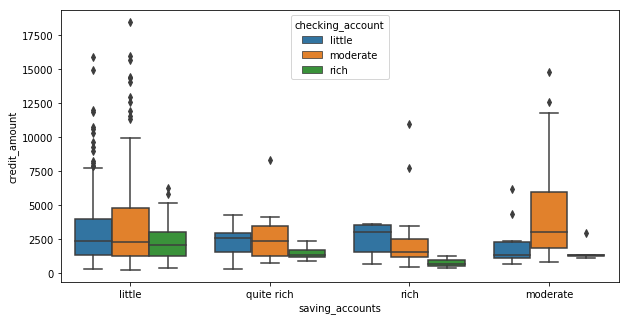

In [26]:
# Outliers
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x='saving_accounts', y='credit_amount', hue='checking_account', data=df)

### Splitting Data

In [27]:
# Indexing data
X = df.iloc[:, :9]
y = df.iloc[:, -1]

# Changing label
y = (y == 'bad')*1

* bad risk = 1
* good rick = 0

In [28]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

# Verifying
print(f'X_train dimension: {X_train.shape}')
print(f'X_test dimension: {X_test.shape}')
print(f'\ny_train dimension: {y_train.shape}')
print(f'y_test dimension: {y_test.shape}')

X_train dimension: (800, 9)
X_test dimension: (200, 9)

y_train dimension: (800,)
y_test dimension: (200,)


### Null Data

In [29]:
# How many in X_train?
X_train.isnull().sum()

age                   0
sex                   0
job                   0
housing               0
saving_accounts     149
checking_account    323
credit_amount         0
duration              0
purpose               0
dtype: int64

Let's try our first approach: fill null data with most common instance of each feature. For that, we created a class to make it easy for the scikit-learn pipeline.

In [30]:
# Filling null data
filler_common = FillNAMostCommon()
X_train_filled = filler_common.transform(X_train)
X_train_filled.isnull().sum()

age                 0
sex                 0
job                 0
housing             0
saving_accounts     0
checking_account    0
credit_amount       0
duration            0
purpose             0
dtype: int64

In [31]:
# Most common values for each feature
most_common_cc = X_train['checking_account'].value_counts().index[0]
most_common_cp = X_train['saving_accounts'].value_counts().index[0]
print(f'Most common in checking_account: {most_common_cc}')
print(f'Most common in saving_accounts: {most_common_cp}')

Most common in checking_account: moderate
Most common in saving_accounts: little


Recording that maybe this isn't the best approach, but let's construct our first model like this and after we can improve it.

### Categorical Features

In [38]:
X_attempt.values.reshape(1, -1)

array([['male', 'male', 'male', 'female', 'female', 'female', 'male',
        'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male',
        'female', 'female', 'female', 'male', 'female', 'male', 'female',
        'female', 'female', 'female', 'male', 'male', 'female', 'male',
        'female', 'male', 'male', 'male', 'female', 'male', 'male',
        'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
        'female', 'male', 'male', 'male', 'male', 'male', 'female',
        'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
        'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
        'male', 'male', 'female', 'male', 'female', 'male', 'female',
        'female', 'male', 'female', 'female', 'male', 'female', 'male',
        'female', 'male', 'male', 'female', 'male', 'female', 'male',
        'male', 'male', 'male', 'male', 'male', 'male', 'female',
        'female', 'male', 'male', 'male', 'female', 'male', 'male',
        

In [35]:
# Testing for sex feature
X_attempt = X_train_filled['sex']


# OneHot
encoder = OneHotEncoder(sparse=False)
X_attempt_1hot = encoder.fit_transform(X_attempt.reshape(1, -1))

AttributeError: 'Series' object has no attribute 'reshape'

In [33]:
# Encoded
X_attempt_encoded[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [34]:
# Original
X_attempt[:5]

29       male
535      male
695      male
557    female
836    female
Name: sex, dtype: object

In [35]:
# Categories
X_attempt_categories

Index(['male', 'female'], dtype='object')

In [36]:
# One Hot
X_attempt_1hot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [37]:
# Testing for all categorical features
cat_attribs = ['sex', 'housing', 'saving_accounts', 
               'checking_account', 'purpose']
X_train_cat = X_train_filled.loc[:, cat_attribs]
X_train_cat.head(1)

,sex,housing,saving_accounts,checking_account,purpose
29,male,own,little,little,business


In [38]:
# Applying encoder
encoder = OneHotEncoder(sparse=False)
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_train_cat_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

### Feature Scaling

As we can see, we have features in different ranges in our dataset and this can be a problem for a model to fing the minimum global.

In [39]:
# What we have until now
X_train_filled.head(1)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose
29,63,male,2,own,little,little,6836,60,business


In [40]:
# Scaling
scaler = StandardScaler()
X_train_filled_num = X_train_filled.loc[:, ['age', 'credit_amount', 'duration']]
X_train_filled_scalled = scaler.fit_transform(X_train_filled_num)

In [41]:
# Before scaling
X_train_filled.head(3)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose
29,63,male,2,own,little,little,6836,60,business
535,33,male,2,rent,little,rich,2319,21,education
695,50,male,2,rent,quite rich,moderate,1236,6,car


In [42]:
# After scaling
X_train_filled_scalled[:3]

array([[ 2.4061873 ,  1.19991221,  3.29708155],
       [-0.22436411, -0.35962991, -0.00805096],
       [ 1.26628169, -0.73354714, -1.27925578]])

## Pipeline

With all operations already mapped, we can think of implementing a pipeline for data transformation. This will be made through the construction of a numerical pipeline, a categorical pipeline and a full pipeline with both.

### Numerical Pipeline

In [43]:
# Numerical features
num_attribs = ['age', 'credit_amount', 'duration']
X_train_num = X_train.loc[:, num_attribs]

# Numerical Pipeline
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

# Applying pipeline
X_train_num_prepared = num_pipeline.fit_transform(X_train_num)

In [44]:
# Verifying
X_train_num_prepared

array([[ 2.4061873 ,  1.19991221,  3.29708155],
       [-0.22436411, -0.35962991, -0.00805096],
       [ 1.26628169, -0.73354714, -1.27925578],
       ...,
       [-0.7504744 ,  0.84360327,  0.24619   ],
       [-0.92584449, -0.64792251, -0.77077385],
       [-1.01352954, -0.83850636, -1.27925578]])

### Categorical Pipeline

In [45]:
# Categorical features
cat_attribs = ['sex', 'job', 'housing', 'saving_accounts', 
               'checking_account', 'purpose']
X_train_cat = X_train.loc[:, cat_attribs]

# Categorical pipeline
cat_pipeline = Pipeline([
    ('fillna_most_common', FillNAMostCommon()),
    ('one_hot', OneHotEncoder(sparse=False))
])

# Applying Pipeline
X_train_cat_prepared = cat_pipeline.fit_transform(X_train_cat)

In [46]:
# Verifying
X_train_cat_prepared

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

### Full Pipeline

In [47]:
# Preparing pipeline
num_attribs = ['age', 'credit_amount', 'duration']
cat_attribs = ['sex', 'job', 'housing', 'saving_accounts', 
               'checking_account', 'purpose']

# Numerical pipeline
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('fillna_most_common', FillNAMostCommon()),
    ('one_hot', OneHotEncoder(sparse=False))
])

# full pipeline
full_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_attribs),
    ('cat_pipeline', cat_pipeline, cat_attribs)
])

# Dados preparados
X_train_prepared = full_pipeline.fit_transform(X_train)

In [48]:
# Verifying
X_train_prepared[0]

array([2.4061873 , 1.19991221, 3.29708155, 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [49]:
# New dimension
X_train_prepared.shape

(800, 27)

## Training a Model

After the data prep pipeline, we can investigate the best models for our task.

### Logistic Regression

Model Accuracy: 0.74

Cross Validation: [0.73291925 0.7375     0.69375    0.725      0.72327044]

Precision: 0.63

Recall: 0.35

f1_score: 0.45

Confusion Matrix: 
[[502  57]
 [165  76]]


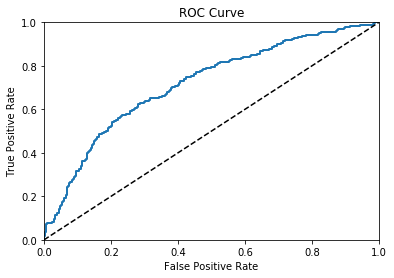

In [50]:
# Train and analysis
log_reg = LogisticRegression()
log_reg.fit(X_train_prepared, y_train)
full_train_analysis(log_reg, X_train_prepared, y_train)

The result isn't so good at all but we keep trying.

### SGD Classifier

Model Accuracy: 0.71

Cross Validation: [0.68944099 0.71875    0.65625    0.75       0.72327044]

Precision: 0.53

Recall: 0.44

f1_score: 0.48

Confusion Matrix: 
[[500  59]
 [175  66]]


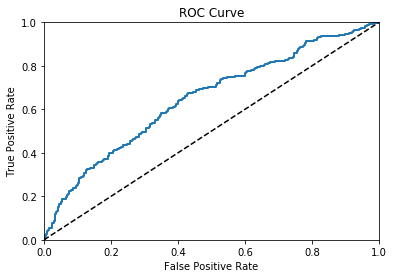

In [51]:
# SGD Classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prepared, y_train)
full_train_analysis(sgd_clf, X_train_prepared, y_train)

Worse than Logistic Regression. The ROC Curve and the confusion matrix show that.

### Decision Trees

Model Accuracy: 1.00

Cross Validation: [0.60869565 0.65625    0.56875    0.65625    0.67924528]

Precision: 1.00

Recall: 1.00

f1_score: 1.00

Confusion Matrix: 
[[409 150]
 [134 107]]


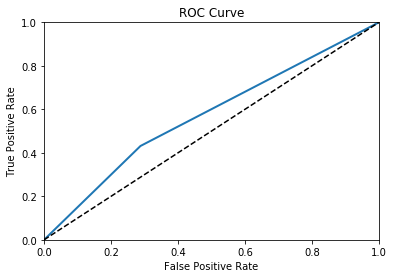

In [52]:
# Decision Trees
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_prepared, y_train)
full_train_analysis(tree_clf, X_train_prepared, y_train)

This is a classic example of overfitting. Tree models tend to overfit data. Even with a 100% accuracy, we get poor results in cross validation.

### Random Forest

Model Accuracy: 0.97

Cross Validation: [0.71428571 0.7375     0.725      0.74375    0.72955975]

Precision: 1.00

Recall: 0.91

f1_score: 0.95

Confusion Matrix: 
[[493  66]
 [163  78]]


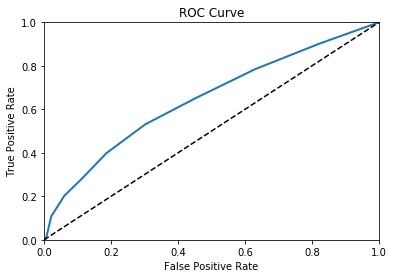

In [53]:
# Random Forest
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_prepared, y_train)
full_train_analysis(forest_clf, X_train_prepared, y_train)

Logistic Regression still the best.

### Multi Layer Perceptron

Model Accuracy: 0.86

Cross Validation: [0.71428571 0.7375     0.71875    0.74375    0.69811321]

Precision: 0.87

Recall: 0.64

f1_score: 0.74

Confusion Matrix: 
[[485  74]
 [150  91]]


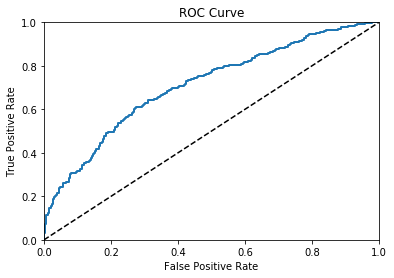

In [54]:
# MLP Classifier
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train_prepared, y_train)
full_train_analysis(mlp_clf, X_train_prepared, y_train)

We get good results comparing to other models, but the time we spent training MLP Classifier was high.

## Grid Search

In [55]:
# params for random forest
param_grid_forest = [
    {
        'n_estimators': [5, 10, 20, 50],        
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2, 5],
        'max_depth': [None, 5, 10, 15],
        'min_samples_leaf': [1, 5],
        'bootstrap': [True, False]
    }
]

#GridSearch
forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid_forest, cv=3,
                           scoring='accuracy', verbose=3)

grid_search.fit(X_train_prepared, y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits
[CV] bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=5 
[CV]  bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=5, score=0.701, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=5 
[CV]  bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=5, score=0.669, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=5 
[CV]  bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=5, score=0.680, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samp

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.722, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.716, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.718, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.711, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=5 
[

[CV]  bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.728, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.722, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.718, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.731, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=50 


[CV]  bootstrap=True, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.707, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.711, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.720, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.741, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, cr

[CV]  bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.705, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.722, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.703, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=5 
[CV]  bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=5, score=0.701, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=5 
[CV]  bootstrap=Tru

[CV]  bootstrap=True, criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.714, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.711, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=5 
[CV]  bootstrap=True, criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=5, score=0.731, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=5 
[CV]  bootstrap=True, criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=5, score=0.692, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=5 
[CV]  bootstrap=True,

[CV]  bootstrap=True, criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.741, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.716, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.707, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.748, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=5 
[CV]  bootst

[CV]  bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.720, total=   0.0s
[CV] bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.714, total=   0.0s
[CV] bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.741, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.716, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_sp

[CV]  bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=20, score=0.714, total=   0.0s
[CV] bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.705, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.726, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.729, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=5 
[

[CV]  bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.677, total=   0.0s
[CV] bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.709, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.726, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.722, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimat

[CV]  bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.726, total=   0.0s
[CV] bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.724, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.741, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.733, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimat

[CV]  bootstrap=True, criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.731, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.733, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.741, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  bootstrap=True, criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.694, total=   0.0s
[CV] bootstrap=True, criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimator

[CV]  bootstrap=False, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=20, score=0.680, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.709, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.680, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.695, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimat

[CV]  bootstrap=False, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.707, total=   0.0s
[CV] bootstrap=False, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.728, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.722, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.744, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=5 
[CV]  bootstrap=F

[CV]  bootstrap=False, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.720, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.726, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.737, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=5 
[CV]  bootstrap=False, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=5, score=0.698, total=   0.0s
[CV] bootstrap=False, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=5 
[CV]  bootstrap=

[CV]  bootstrap=False, criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.735, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.692, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.699, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  bootstrap=False, criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.709, total=   0.0s
[CV] bootstrap=False, criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  boots

[CV]  bootstrap=False, criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=20, score=0.680, total=   0.0s
[CV] bootstrap=False, criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.720, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.718, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.673, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=5 
[CV]  boo

[CV]  bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.716, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.688, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.722, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.716, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=1, min_sa

[CV]  bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.733, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.733, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.724, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.748, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=None, min_samples_leaf=5, min_sa

[CV]  bootstrap=False, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.720, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.718, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.726, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.716, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimat

[CV]  bootstrap=False, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.716, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.699, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.692, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20, score=0.724, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n

[CV]  bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.680, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.650, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.701, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.695, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n

[CV]  bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.703, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.705, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.714, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.711, total=   0.1s


[Parallel(n_jobs=1)]: Done 768 out of 768 | elapsed:   35.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [56]:
# Best params
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 5}

In [57]:
# Best accuracy
grid_search.best_score_

0.74

Model Accuracy: 0.81

Cross Validation: [0.72670807 0.73125    0.725      0.7375     0.74213836]

Precision: 0.84

Recall: 0.47

f1_score: 0.60

Confusion Matrix: 
[[485  74]
 [162  79]]


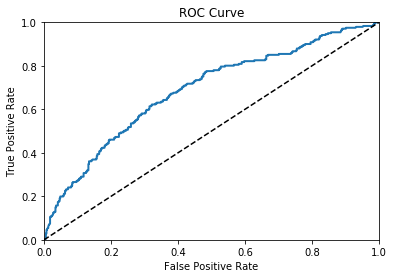

In [58]:
# Analysing
final_model = grid_search.best_estimator_
final_model.fit(X_train_prepared, y_train)
full_train_analysis(final_model, X_train_prepared, y_train)

In [59]:
# Trying Grid Search with Logistic Regression
# params for log reg
param_grid_logreg = [
    {
        'C':np.logspace(-3, 3, 7),
        'penalty':['l1', 'l2']
    }
]

#GridSearch
log_reg_grid = LogisticRegression()
grid_search = GridSearchCV(log_reg_grid, param_grid_logreg, cv=5,
                           scoring='accuracy', verbose=3)

grid_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.696, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.700, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.700, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.700, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.698, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] ................. C=0.001, penalty=l2, score=0.696, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=10.0, penalty=l1, score=0.744, total=   0.0s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .................. C=10.0, penalty=l1, score=0.723, total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV] .................. C=10.0, penalty=l2, score=0.727, total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV] .................. C=10.0, penalty=l2, score=0.750, total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV] .................. C=10.0, penalty=l2, score=0.688, total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV] .................. C=10.0, penalty=l2, score=0.738, total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV] .................. C=10.0, penalty=l2, score=0.723, total=   0.0s
[CV] C=100.0, penalty=l1 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [60]:
# Best params
grid_search.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [61]:
# Best Score
grid_search.best_score_

0.7325

Model Accuracy: 0.75

Cross Validation: [0.7515528  0.73125    0.69375    0.75       0.73584906]

Precision: 0.65

Recall: 0.36

f1_score: 0.46

Confusion Matrix: 
[[507  52]
 [162  79]]


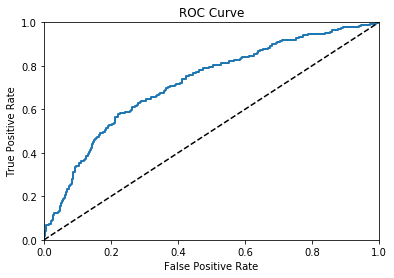

In [62]:
# Analysing
final_model = grid_search.best_estimator_
final_model.fit(X_train_prepared, y_train)
full_train_analysis(final_model, X_train_prepared, y_train)

## Predicting Null Data

In begining of data preparation, we filled the null data of the columns saving_accounts and checking_accounts with the most common instance. Maybe this isn't the best approach. So, let's try making a pipeline to predict the null data with the filled data we have for both columns.

In [63]:
# Pipeline for checking account
num_attribs_cc = ['age', 'credit_amount', 'duration']
cat_attribs_cc = ['sex', 'job', 'housing', 'purpose', 'risk']

# Num pipeline
num_pipeline_cc = Pipeline([
    ('std_scaler', StandardScaler())
])

# Cat pipeline
cat_pipeline_cc = Pipeline([
    ('one_hot', OneHotEncoder(sparse=False))
])

# full checking account pipeline
full_pipeline_cc = ColumnTransformer([
    ('num_pipeline', num_pipeline_cc, num_attribs_cc),
    ('cat_pipeline', cat_pipeline_cc, cat_attribs_cc)
])

In [64]:
# pipeline for saving_accounts
num_attribs_cp = ['age', 'credit_amount', 'duration']
cat_attribs_cp = ['sex', 'job', 'housing', 'purpose', 'risk', 'checking_account']

# Num pipeline
num_pipeline_cp = Pipeline([
    ('std_scaler', StandardScaler())
])

# cat pipeline
cat_pipeline_cp = Pipeline([
    ('one_hot', OneHotEncoder(sparse=False))
])

# full pipeline for saving accounts
full_pipeline_cp = ColumnTransformer([
    ('num_pipeline', num_pipeline_cp, num_attribs_cp),
    ('cat_pipeline', cat_pipeline_cp, cat_attribs_cp)
])

In [65]:
class FillCheckingAcc(BaseEstimator, TransformerMixin):
    
    def fit(self, df, y=None):
        return self
    
    def transform(self, df, y=None):
        
        # features to predict checking account
        features_cc = ['age', 'sex', 'job', 'housing', 'credit_amount', 'duration', 
                       'purpose', 'risk']
        label_cc = ['checking_account']
        
        # checking account indexing
        X_cc_notnull = df[df['checking_account'].notnull()]
        X_cc_null = df[df['checking_account'].isnull()]
        X_train_cc = X_cc_notnull.loc[:, features_cc]
        y_train_cc = X_cc_notnull.loc[:, label_cc]
        X_fill_cc = X_cc_null.loc[:, features_cc]
        
        # data prep
        X_cc_prepared = full_pipeline_cc.fit_transform(X_train_cc)
        X_cc_fill_prepared = full_pipeline_cc.fit_transform(X_fill_cc)
       
        # training a model and predicting
        log_reg_cc = LogisticRegression()
        log_reg_cc.fit(X_cc_prepared, y_train_cc)
        cc_pred = log_reg_cc.predict(X_cc_fill_prepared)
        X_cc_null['checking_account'] = cc_pred
        
        return pd.concat([X_cc_notnull, X_cc_null])

In [66]:
# Handling checking_account null data
filler_checking_account = FillCheckingAcc()
df_full_cc = filler_checking_account.fit_transform(df)

In [67]:
# Verifying
df_full_cc.isnull().sum()

age                   0
sex                   0
job                   0
housing               0
saving_accounts     183
checking_account      0
credit_amount         0
duration              0
purpose               0
risk                  0
dtype: int64

In [68]:
# Definindo uma classe
class FillSavingAcc(BaseEstimator, TransformerMixin):
    
    def fit(self, df, y=None):
        return self
    
    def transform(self, df, y=None):
        
        # features to predict saving account
        features_cp = ['age', 'sex', 'job', 'housing', 'credit_amount', 'duration', 
                       'purpose', 'risk', 'checking_account']
        label_cp = ['saving_accounts']
        
        # saving account indexing
        X_cp_notnull = df[df['saving_accounts'].notnull()]
        X_cp_null = df[df['saving_accounts'].isnull()]
        X_train_cp = X_cp_notnull.loc[:, features_cp]
        y_train_cp = X_cp_notnull.loc[:, label_cp]
        X_fill_cp = X_cp_null.loc[:, features_cp]
        
        # data prep
        X_cp_prepared = full_pipeline_cp.fit_transform(X_train_cp)
        X_cp_fill_prepared = full_pipeline_cp.fit_transform(X_fill_cp)
       
        # traning a model and predicting 
        log_reg_cp = MLPClassifier()
        log_reg_cp.fit(X_cp_prepared, y_train_cp)
        cp_pred = log_reg_cp.predict(X_cp_fill_prepared)
        X_cp_null['saving_accounts'] = cp_pred
        
        return pd.concat([X_cp_notnull, X_cp_null])

In [69]:
# Applying
filler_saving_accouns = FillSavingAcc()
df_full_complete = filler_saving_accouns.fit_transform(df_full_cc)

In [70]:
# Verifying
df_full_complete.isnull().sum()

age                 0
sex                 0
job                 0
housing             0
saving_accounts     0
checking_account    0
credit_amount       0
duration            0
purpose             0
risk                0
dtype: int64

In [71]:
# Head
df_full_complete.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad


The null data was filled by predictions of a traning.

In [72]:
# Indexing data
X = df_full_complete.iloc[:, :9]
y = df_full_complete.iloc[:, -1]

# label 0s and 1s
y = (y == 'bad')*1

In [73]:
# Splitting
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=.20)

In [74]:
# new pipeline
num_attribs = ['age', 'credit_amount', 'duration']
cat_attribs = ['sex', 'job', 'housing', 'saving_accounts', 
               'checking_account', 'purpose']

# Criando pipeline numérico
new_num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

# Criando pipeline categórico
new_cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder(sparse=False))
])

# Definindo pipeline completo
new_full_pipeline = ColumnTransformer([
    ('num_pipeline', new_num_pipeline, num_attribs),
    ('cat_pipeline', new_cat_pipeline, cat_attribs)
])

# Dados preparados
X_train_prepared_new = new_full_pipeline.fit_transform(X_train_new)

Model Accuracy: 0.71

Cross Validation: [0.68944099 0.71428571 0.6875     0.6918239  0.72327044]

Precision: 0.55

Recall: 0.20

f1_score: 0.29

Confusion Matrix: 
[[518  44]
 [195  43]]


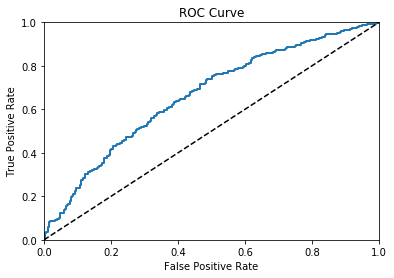

In [75]:
# Train and analysis
log_reg_new = LogisticRegression()
log_reg_new.fit(X_train_prepared_new, y_train_new)
full_train_analysis(log_reg_new, X_train_prepared_new, y_train_new)

There was no improvement. Let's try Grid Search.

In [76]:
# Trying Grid Search with Logistic Regression
# params for log reg
param_grid_logreg = [
    {
        'C':np.logspace(-3, 3, 7),
        'penalty':['l1', 'l2']
    }
]

#GridSearch
log_reg_grid_new = LogisticRegression()
grid_search = GridSearchCV(log_reg_grid_new, param_grid_logreg, cv=5,
                           scoring='accuracy', verbose=3)

grid_search.fit(X_train_prepared_new, y_train_new)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.702, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.702, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.700, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.704, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.704, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] ................. C=0.001, penalty=l2, score=0.702, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=10.0, penalty=l2, score=0.698, total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV] .................. C=10.0, penalty=l2, score=0.717, total=   0.0s
[CV] C=100.0, penalty=l1 .............................................
[CV] ................. C=100.0, penalty=l1, score=0.702, total=   0.0s
[CV] C=100.0, penalty=l1 .............................................
[CV] ................. C=100.0, penalty=l1, score=0.689, total=   0.0s
[CV] C=100.0, penalty=l1 .............................................
[CV] ................. C=100.0, penalty=l1, score=0.688, total=   0.1s
[CV] C=100.0, penalty=l1 .............................................
[CV] ................. C=100.0, penalty=l1, score=0.698, total=   0.1s
[CV] C=100.0, penalty=l1 .............................................
[CV] ................. C=100.0, penalty=l1, score=0.717, total=   0.0s
[CV] C=100.0, penalty=l2 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

Model Accuracy: 0.71

Cross Validation: [0.70807453 0.70807453 0.69375    0.71698113 0.72327044]

Precision: 0.67

Recall: 0.08

f1_score: 0.14

Confusion Matrix: 
[[551  11]
 [221  17]]


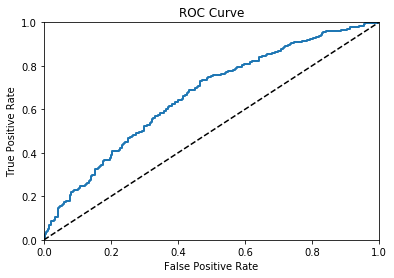

In [77]:
# Analysing
final_model_new = grid_search.best_estimator_
final_model_new.fit(X_train_prepared_new, y_train_new)
full_train_analysis(final_model_new, X_train_prepared_new, y_train_new)

Model Accuracy: 0.71

Cross Validation: [0.71428571 0.69375    0.70625    0.71875    0.71069182]

Precision: 0.62

Recall: 0.14

f1_score: 0.23

Confusion Matrix: 
[[540  19]
 [214  27]]


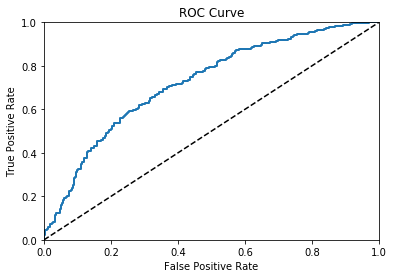

In [78]:
# Comparing with previous result
final_model = grid_search.best_estimator_
final_model.fit(X_train_prepared, y_train)
full_train_analysis(final_model, X_train_prepared, y_train)

With previous result, we got a True Positive rate higher. Let's keep with the first Random Forest we got.

## Test Accuracy

In [89]:
# Data prep
X_test_prepared = full_pipeline.fit_transform(X_test)
y_pred = final_model.predict(X_test_prepared)
accuracy_score(y_pred, y_test)

0.695